In [34]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

___

In [35]:
# Load the data
d = pd.read_csv('titanic.csv')
survived = d['Survived']

In [36]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
d.drop("PassengerId", axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checklist:
    - create new variables (enhansment of some variables: child, or women on the first class)
    - drop irrelevant variables ('Name', 'Ticket', 'Cabin')
    - fill nulls (mean, median, 0, depending on the data)
    - deal with categorical - possibly create dummy variables ('Sex', 'Embarked')
    - normilize/standadize variables
    - balance the data set (by the dependant variable)
    - check for correlation (possibly drop variables)

In [38]:
# drop useless columns
d = d.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
d.isnull().sum(axis = 0)

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### FIX NAN VALUES

In [39]:
# Dealing with null values, for numerical:
for col in d.columns:
    if d[col].dtype != object:
        d[col]=d[col].fillna(d[col].mean())
#could think of a better way such as use the different mens for male and female

In [40]:
d.isnull().sum(axis = 0)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### ONE HOT ENCODING & NORMALIZATION

In [41]:
d.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [42]:
# Create dummies - for better model outcomes
d = pd.get_dummies(d)
d.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [43]:
# Data Normalization
names = d.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(d[["Age", "Fare"]])
d[["Age", "Fare"]] = scaled_d
d.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,0,1
4,3,0.434531,0,0,0.015713,0,1,0,0,1


In [44]:
d['Survived'] = pd.Series(survived)

# Class balance
ld = d[d.Survived == 1]
no_ld = d[d.Survived == 0]
print("SURVIVED: ", len(ld), " NOT SURVIVED: ", len(no_ld))

SURVIVED:  342  NOT SURVIVED:  549


In [72]:
balanced_d = pd.concat([ld, no_ld.sample(len(ld))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

     Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
1         1  0.472229      1      0  0.139136           1         0   
2         3  0.321438      0      0  0.015469           1         0   
3         1  0.434531      1      0  0.103644           1         0   
8         3  0.334004      0      2  0.021731           1         0   
9         2  0.170646      1      0  0.058694           1         0   
..      ...       ...    ...    ...       ...         ...       ...   
680       3  0.367921      0      0  0.015883           1         0   
302       3  0.233476      0      0  0.000000           0         1   
626       2  0.710983      0      0  0.024106           0         1   
317       2  0.673285      0      0  0.027326           0         1   
177       1  0.623021      0      0  0.056043           1         0   

     Embarked_C  Embarked_Q  Embarked_S  
1             1           0           0  
2             0           0           1  
3             0      

(684, 11)

## CORRELATION ANALYSIS

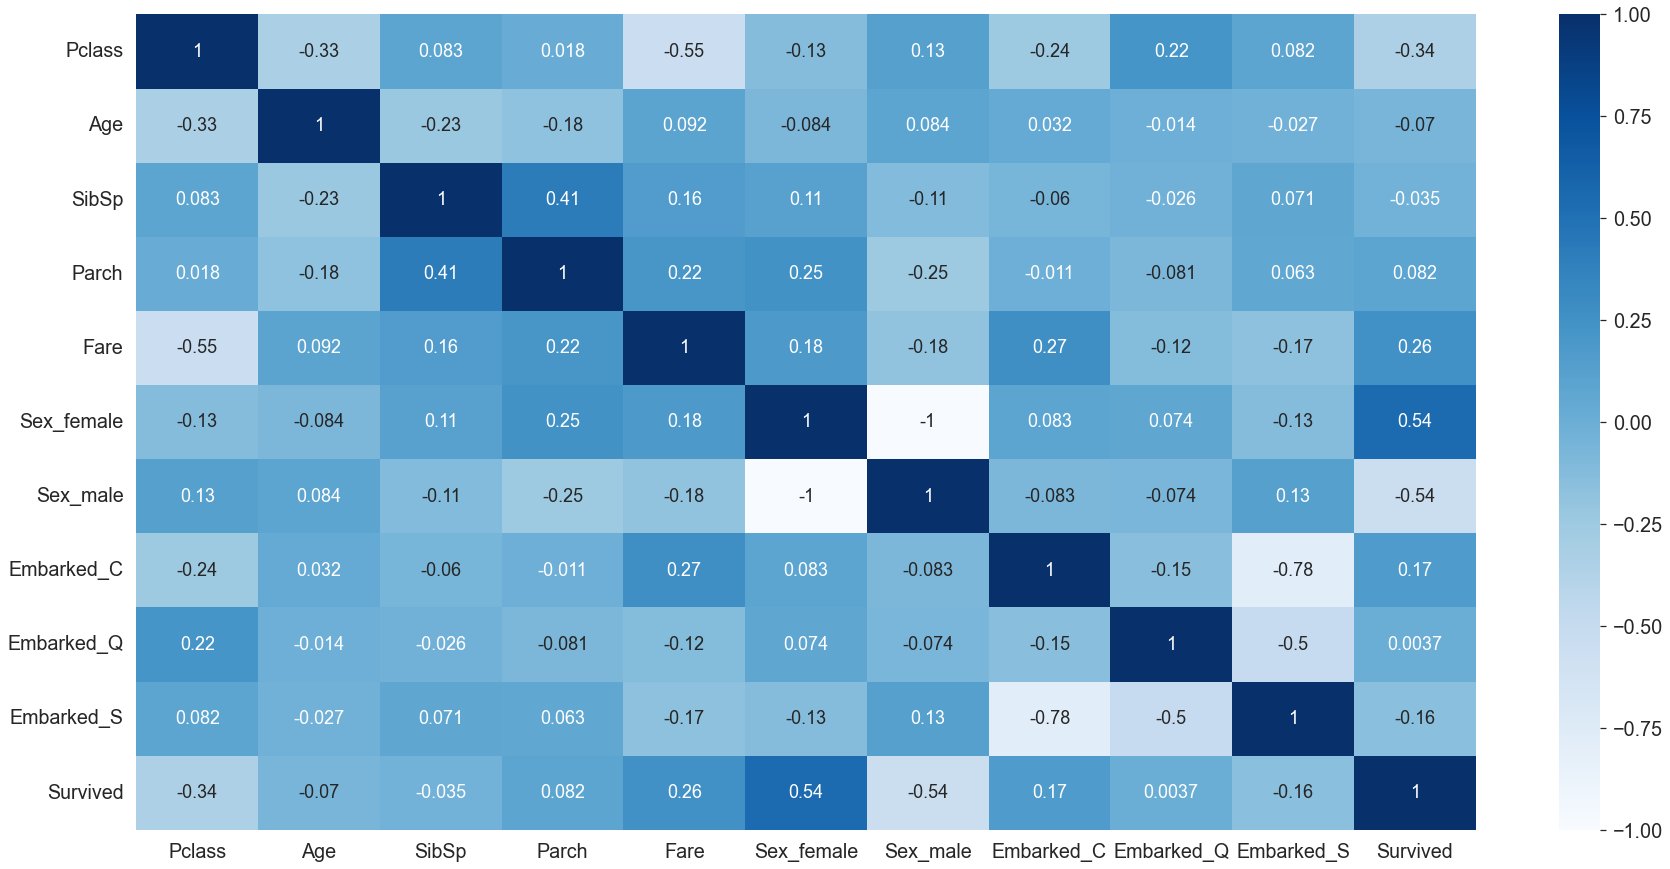

In [46]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(30,15))
ax = sns.heatmap(d[d.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [47]:
# Drop values to avoid variables with too high correlation
x = x.drop(['Sex_male', 'Embarked_C'], axis=1)

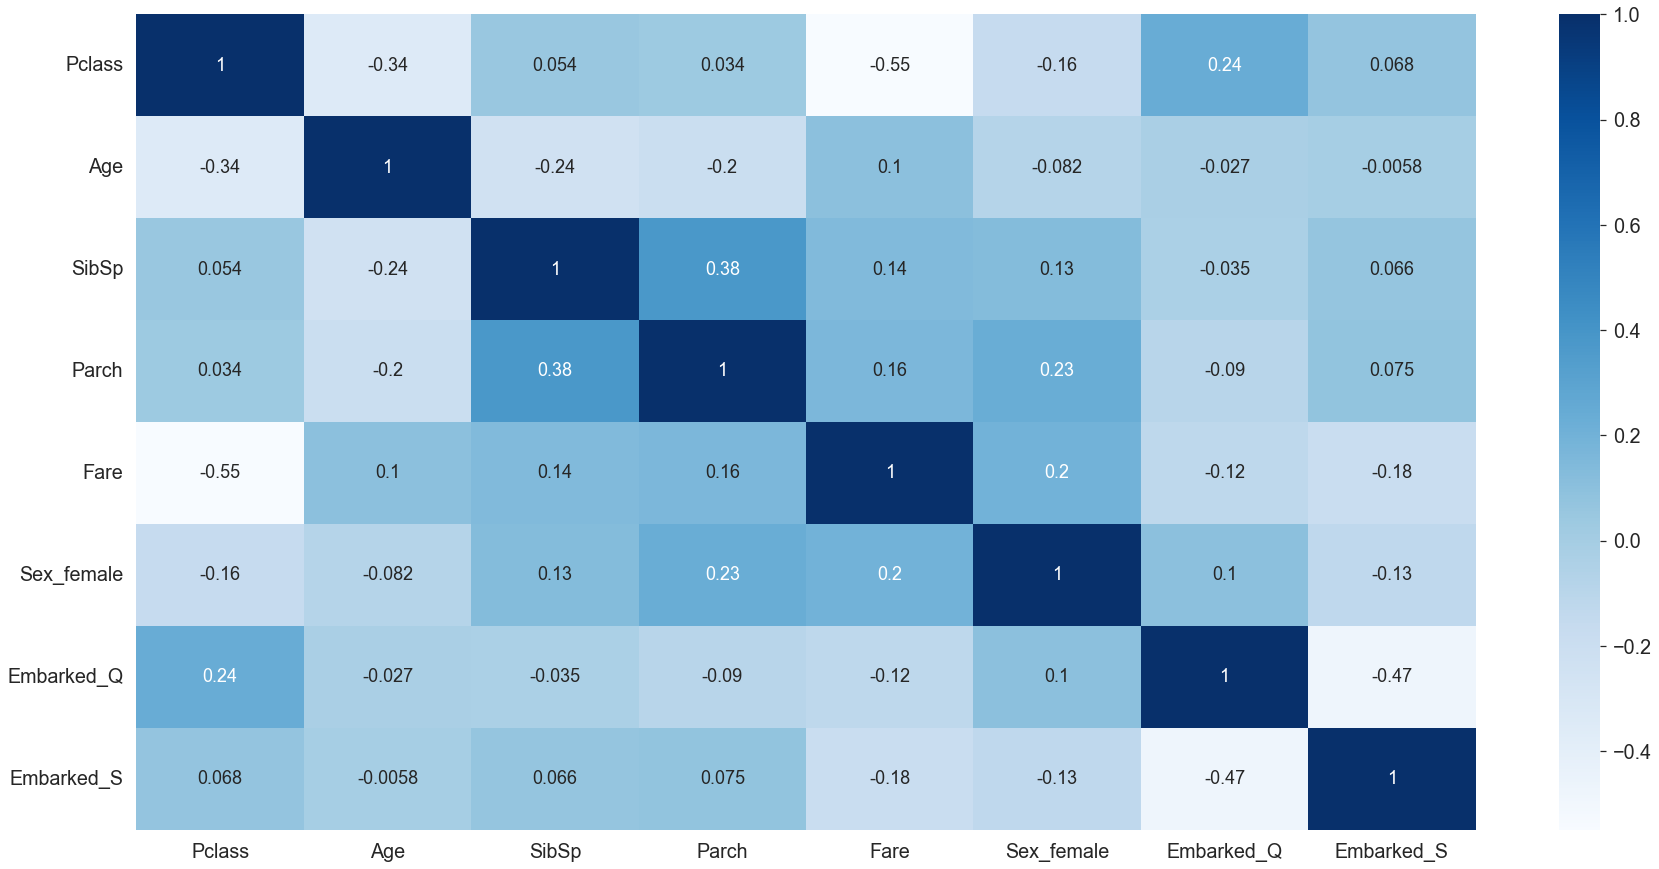

In [48]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

____
# CLASSIFICATION

In [49]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(547, 8)
(137, 8)
(547, 1)
(137, 1)


In [50]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [51]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.74 	 ---> LogisticRegression 
Accuracy: 0.67 	 ---> DecisionTreeClassifier 
Accuracy: 0.73 	 ---> SVC 
Accuracy: 0.73 	 ---> RandomForestClassifier 


Text(0.5, 1.0, 'Cross validation scores')

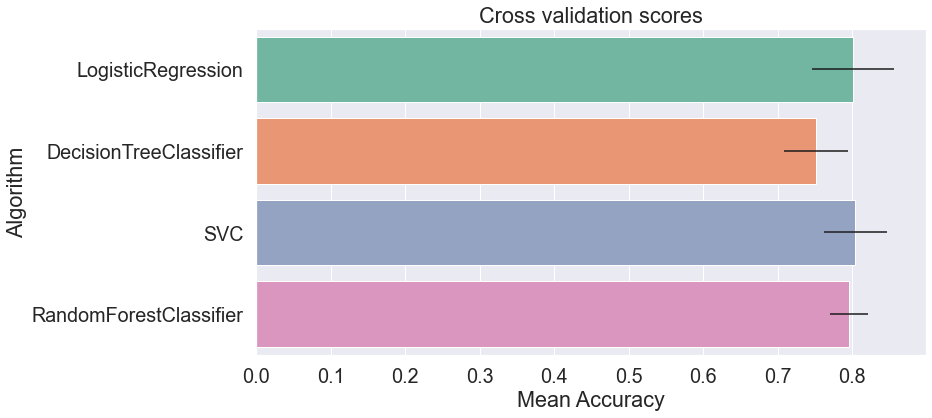

In [52]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

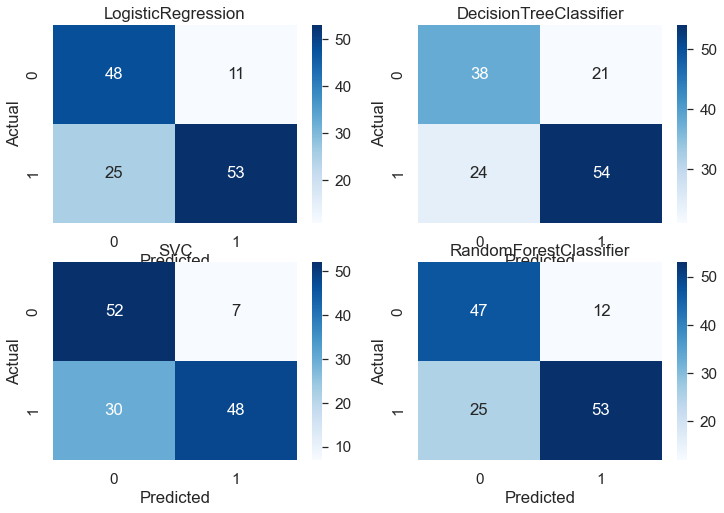

In [53]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(2,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [54]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73        59
           1       0.83      0.68      0.75        78

    accuracy                           0.74       137
   macro avg       0.74      0.75      0.74       137
weighted avg       0.75      0.74      0.74       137

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.63        59
           1       0.72      0.69      0.71        78

    accuracy                           0.67       137
   macro avg       0.67      0.67      0.67       137
weighted avg       0.67      0.67      0.67       137

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.74        59
           1       0.87      0.62      0.72        78

    accuracy                           0.73       137
   macro avg 

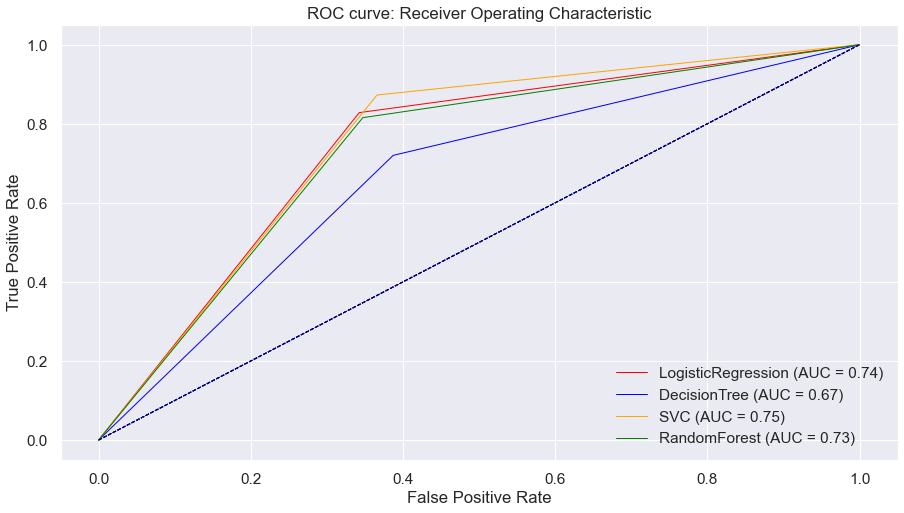

In [55]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [56]:
# Search grid for optimal parameters

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [57]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

score without GridSearchCV:  0.751 0.795
score with GridSearchCV:  0.808 0.826


Text(0.5, 1.0, 'Correlation between models')

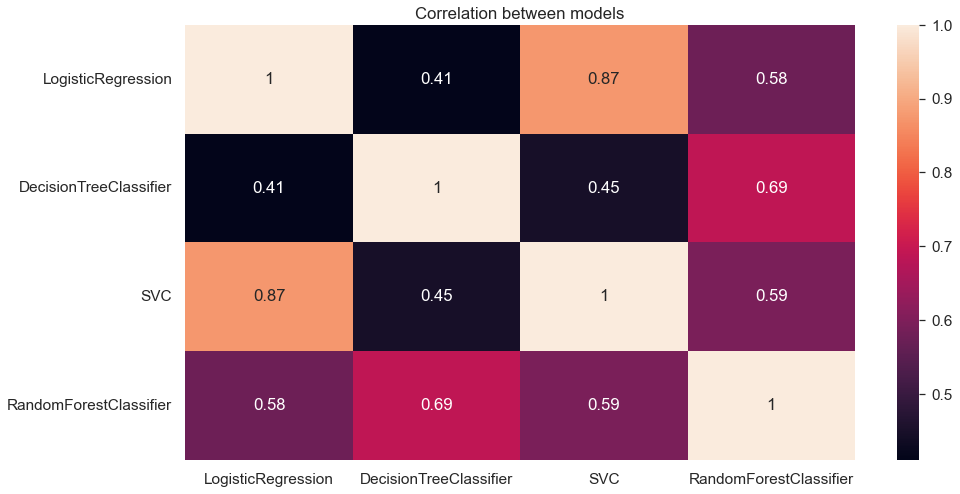

In [58]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("Survived", axis=1).corr(),annot=True)
plt.title("Correlation between models")

## MODEL ENSEMBLE
### VOTING TYPE:
- HARD: uses predicted class labels for majority rule voting
- SOFT: predicts the class label based on the argmax of the sums of the predicted probabilities

In [59]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train)
print(accuracy_score(y_test,best_model.predict(x_test)))

0.7226277372262774


## TEST THE MODEL

In [60]:
# Load the test data
d2 = pd.read_csv('titanic_test.csv')
PassengerId = d2['PassengerId'] #save this variable for correct format of the submision

# Drop values
d2 = d2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Dealing with null values, for numerical:
for col in d2.columns:
    if d2[col].dtype != object:
        d2[col]=d2[col].fillna(d[col].mean())

# Create dummies - for better model outcomes (also deals with nulls in categorical)
d2 = pd.get_dummies(d2)

# Data Normalization

scaled_d2 = scaler.transform(d2[["Age", "Fare"]])
d2[["Age", "Fare"]] = scaled_d2

# Drop values to avoid multicolinearity
d2 = d2.drop(['Sex_male', 'Embarked_C'], axis=1)

In [61]:
#train the model on the whole dataset and produce results:
survived_pred = pd.Series(best_model.predict(d2), name='Survived')

In [62]:
survived_pred.value_counts()

1    233
0    185
Name: Survived, dtype: int64

## YELLOWBRICK

In [63]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

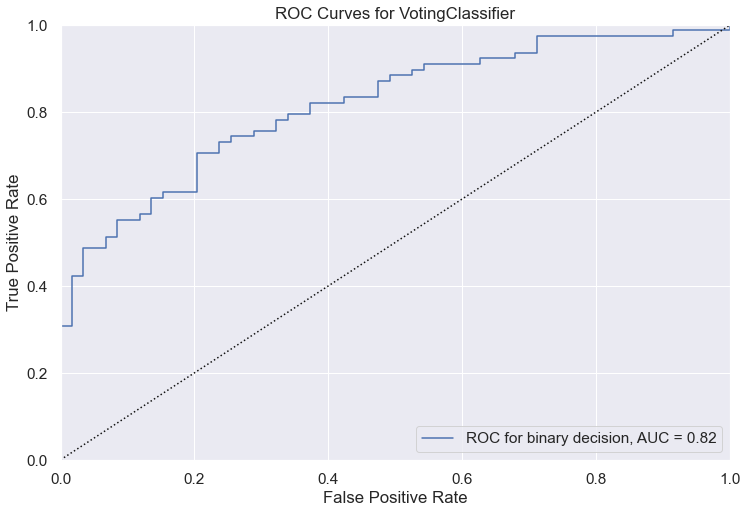

<AxesSubplot:title={'center':'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
# Instantiate the visualizer with the classification model
plt.figure(figsize=(12,8))
visualizer = ROCAUC(best_model, classes=["not_survived", "survived"], micro=False, macro=False, binary=True)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

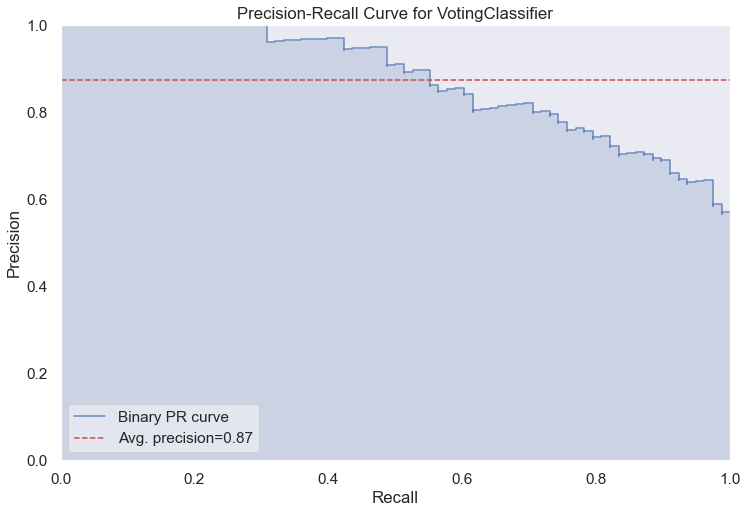

<AxesSubplot:title={'center':'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [65]:
plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

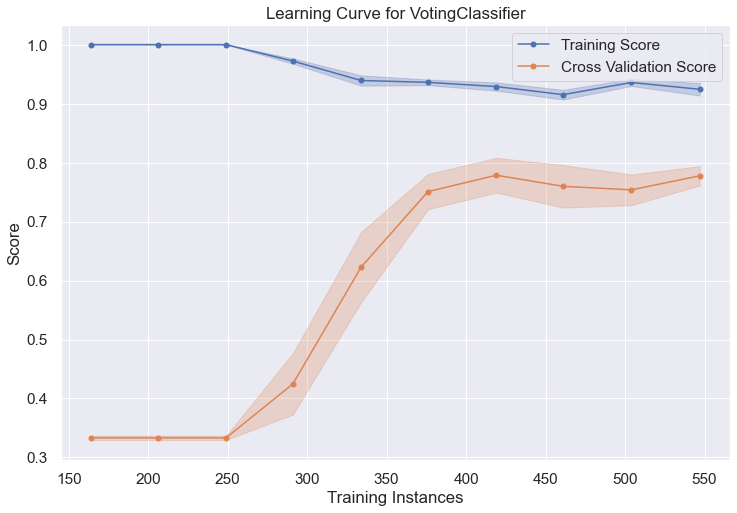

<AxesSubplot:title={'center':'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [66]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure